In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\bmoha\Downloads\malicious_ip_logs_1000.csv")
df

,IP_Address,Ports_Accessed,Failed_Connections,Country_Code,Blacklist_History,Label
0,126.221.46.77,12,5,124,0,0
1,43.243.114.45,6,4,124,0,0
2,179.204.107.186,11,5,124,1,1
3,110.255.71.29,14,4,356,0,0
4,41.119.20.234,7,6,124,0,0
...,...,...,...,...,...,...
995,201.249.207.90,6,6,276,1,1
996,168.220.144.51,10,3,250,1,1
997,103.199.159.108,10,5,840,0,0
998,153.23.131.142,18,6,124,1,1


In [7]:
# Step 2: Drop IP_Address as it's not a useful feature for ML
df.drop("IP_Address", axis=1, inplace=True)


In [9]:
# Step 3: Explore data
print("Dataset Summary:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nLabel distribution:\n", df["Label"].value_counts())

Dataset Summary:
        Ports_Accessed  Failed_Connections  Country_Code  Blacklist_History  \
count     1000.000000         1000.000000   1000.000000        1000.000000   
mean         9.904000            4.937000    410.548000           0.291000   
std          3.227879            2.085037    242.416475           0.454451   
min          1.000000            0.000000    124.000000           0.000000   
25%          8.000000            3.000000    250.000000           0.000000   
50%         10.000000            5.000000    276.000000           0.000000   
75%         12.000000            6.000000    643.000000           1.000000   
max         21.000000           12.000000    840.000000           1.000000   

             Label  
count  1000.000000  
mean      0.404000  
std       0.490943  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

Missing values:
 Ports_Accessed        0
Failed_Connections    0
Country_Code          0


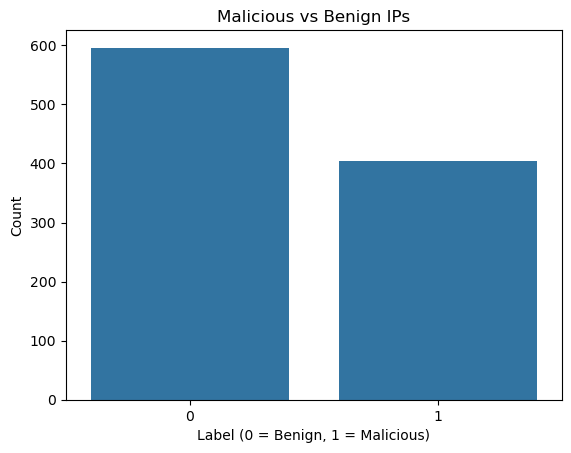

In [11]:
# Step 4: Visualize class distribution
sns.countplot(x="Label", data=df)
plt.title("Malicious vs Benign IPs")
plt.xlabel("Label (0 = Benign, 1 = Malicious)")
plt.ylabel("Count")
plt.show()

In [13]:
# Step 5: Define feature matrix X and target vector y
X = df.drop("Label", axis=1)
y = df["Label"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
# Step 6: Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 7: Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
# Step 8: Predict on test set
y_pred = model.predict(X_test)

In [23]:
# Step 9: Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[111   4]
 [ 12  73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       115
           1       0.95      0.86      0.90        85

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200

Accuracy Score: 0.92


In [31]:
# sample dataset for prediction

import pandas as pd

# Sample new data (same format as training features)
sample_data = pd.DataFrame({
    "Ports_Accessed": [18, 3, 12],
    "Failed_Connections": [10, 1, 4],
    "Country_Code": [840, 356, 276],
    "Blacklist_History": [1, 0, 0]
})
sample_data

,Ports_Accessed,Failed_Connections,Country_Code,Blacklist_History
0,18,10,840,1
1,3,1,356,0
2,12,4,276,0


In [27]:
# Predict using trained model
predictions = model.predict(sample_data)


In [29]:
# Show predictions
for i, pred in enumerate(predictions):
    label = "Malicious" if pred == 1 else "Benign"
    print(f"Sample {i+1} Prediction: {label}")

Sample 1 Prediction: Malicious
Sample 2 Prediction: Benign
Sample 3 Prediction: Benign
